<h1 style="font-size:240%; color:red; text-align:center; line-height:45px;"> 1. Principales Técnicas de Interpolación en Imágenes Digitales </h1>

<p style="font-size:135%;">Se ilustra un estudio, implementación y análisis de desempeño de las siguientes técnicas de interpolación:</p>
<ul style="font-size:135%;">
    <li>Interpolación por Vecinos más Cercanos
    <li>Interpolación Bilineal
    <li>Interpolación Bicúbica
    <li>Interpolación B-Splines
</ul>

<p style="font-size:135%;">De forma general, la interpolación en las fotografías consiste en un proceso en el cual se calculan valores numéricos desconocidos a partir de valores conocidos, esto sirve para obtener una nueva imagen a partir de una imagen base a la cual se le aplican transformaciones geométricas como escalado (Modificación del tamaño de la imagen), rotación (Aplicación de giro de una imagen en cierto ángulo), entre otras operaciones.</p>

<h1 style="font-size:200%; color:red; text-align:center; line-height : 55px;"> 1.1. Interpolación por Vecinos más Cercanos </h1>

<p style="font-size:135%;">Es un método en el que para la nueva imagen al aumentar de tamaño, simplemente se aumenta el tamaño de cada pixel de la imagen en cierto factor de escala o al reducir la nueva imagen de tamaño, cada pixel tendrá como valor el pixel más cercano de la imagen original por medio de un mapeo lineal. Visualmente, a partir de una imagen que aumentará de tamaño, se podrá notar un efecto de pixelado.</p>

<p style="font-size:135%;">A partir de una imagen $f$ de tamaño de $m$ pixeles de alto y $n$ pixeles de ancho, se define una función de parametrización $h$ dada por:</p>

<ul style="font-size:175%; line-height : 35px; text-align:center;">
    $h(t)=\left \{   \begin{matrix}
1 & si\: -1 \leq t \leq 1 \\ 
0 & en\:otro\:caso
\end{matrix}  \right..$
</ul>

<p style="font-size:135%;">La función $g(r,s)$ permite hallar el valor del nuevo pixel a partir de un pixel $f(x,y)$ conocido como pixel más cercano al pixel que se está interpolando, donde a la imagen original se le aplicará una transformación de escalado en unos factores de escala $k_{1}, k_{2} > 0$ (Factor de Escala de Ancho y Factor de Escala de Alto). Particularmente, si $k_{1}, k_{2} > 1$, la nueva imagen aumentará de tamaño o si $k_{1}, k_{2} < 1$, la nueva imagen se reducirá de tamaño. La fórmula $g(r,s)$ está dada por:</p>

<ul style="font-size:175%; line-height : 35px; text-align:center;">
    $g(r,s)=h(t_{1})*h(t_{2})*f(x,y)\:\:\:donde\:\:\:t_{1}=\frac{r-x}{\lceil k_{1} \rceil}\:\:y\:\:t_{2}=\frac{s-y}{\lceil k_{2} \rceil}$
</ul>

<p style="font-size:135%;">El valor del pixel más cercano $(x,y)$ al pixel que se está interpolando $(r,s)$ se puede definir en términos de $r$ y $s$, por medio de la siguiente fórmula:</p>

<ul style="font-size:175%; line-height : 35px; text-align:center;">
    $(x,y)=(\lfloor \frac{r}{k_{1}} \rfloor, \lfloor \frac{s}{k_{2}} \rfloor)=(r-r\:mod\:\lceil k_{1} \rceil,s-s\:mod\:\lceil k_{2} \rceil)$
</ul>

<p style="font-size:135%;">Por lo tanto, la fórmula $g(r,s)$ estará dada por:</p>

<ul style="font-size:175%; line-height : 35px; text-align:center;">
    $g(r,s)=h(\frac{r\:mod\:\lceil k_{1} \rceil}{\lceil k_{1} \rceil})*h(\frac{s\:mod\:\lceil k_{2} \rceil}{\lceil k_{2} \rceil})*f(\lfloor \frac{r}{k_{1}} \rfloor,\lfloor \frac{s}{k_{2}} \rfloor)$
</ul>

<p style="font-size:135%;">En la siguiente tabla, se ilustran los resultados de esta interpolación para una imagen pequeña:</p>

<table style="border: #0000FF 2px solid;">
    <tr style="border: #0000FF 2px solid;">
        <th colspan="1"><p style="font-size:135%;">Imagen Original</p></th>
        <th colspan="2" style="border: #0000FF 2px solid;"><img src="Figures/frutosRojos.jpg"></th>
    </tr>
    <tr style="border: #0000FF 2px solid;">
        <th colspan="1"><p style="font-size:135%;">Aplicación de Interpolación de Vecinos más cercanos con factor de escala de 0.5x</p></th>
        <th colspan="2" style="border: #0000FF 2px solid;"><img src="Figures/frutosRojosVecinosMasCercanos05.jpg"></th>
    </tr>
    <tr style="border: #0000FF 2px solid;">
        <th colspan="1"><p style="font-size:135%;">Aplicación de Interpolación de Vecinos más cercanos con factor de escala de 2x</p></th>
        <th colspan="2" style="border: #0000FF 2px solid;"><img src="Figures/frutosRojosVecinosMasCercanos2.jpg"></th>
    </tr>
    <tr style="border: #0000FF 2px solid;">
        <th colspan="1"><p style="font-size:135%;">Aplicación de Interpolación de Vecinos más cercanos con factor de escala de 4x</p></th>
        <th colspan="2" style="border: #0000FF 2px solid;"><img src="Figures/frutosRojosVecinosMasCercanos4.jpg"></th>
    </tr>
</table>

<p style="font-size:135%;">En el siguiente código se muestra la implementación de este algoritmo además de una visualización de su resultado al aplicarlo en una imagen a la cual se realizara un zoom en factor de 10x y luego la interpolacion:</p>

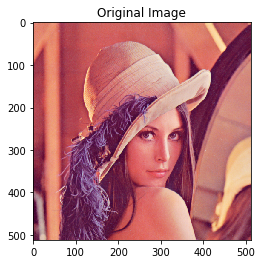

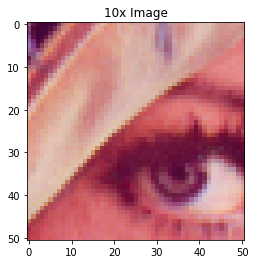

In [530]:
%matplotlib inline
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
import math

image = cv2.imread('Figures/Lenna.png',-1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

h = image.shape[0]
w = image.shape[1]

image10x = image[int(h/2-h/20):int(h/2+h/20),int(w/2-w/20):int(w/2+w/20)]


plt.figure(3)
plt.imshow(image)
plt.title('Original Image')

plt.figure(4)
plt.imshow(image10x)
plt.title('10x Image')

plt.show()



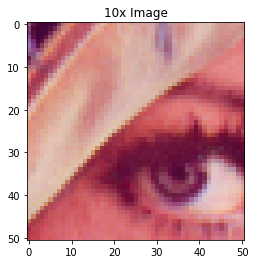

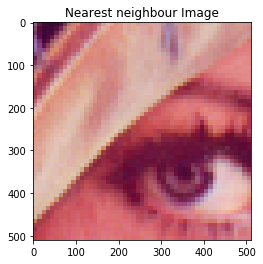

In [531]:
#Funcion de parametrizacion para escalado global (Ampliacion o Reduccion) de imagenes
def parametrizacionInterpolacionVecinosMasCercanos(valor):
    if -1 <= valor and valor <= 1:
        return 1
    else:
        return 0

def interpolacionVecinosMasCercanos(imagenOriginal, factorEscalaAncho, factorEscalaAlto):
    #Reconocimiento de las dimensiones de la imagen original (Pixeles de ancho y de alto)
    altoImagen, anchoImagen = imagenOriginal.shape[:2]
    #Creacion de una imagen a color en blanco con las dimensiones de la imagen resultante
    altoNuevaImagen = int(altoImagen * factorEscalaAlto)
    anchoNuevaImagen = int(anchoImagen * factorEscalaAncho)
    imagenResultante = np.zeros((altoNuevaImagen, anchoNuevaImagen, 3), np.uint8)
    #Cada pixel de la imagen resultante tendra el color del pixel mas cercano al pixel que se esta interpolando
    for fila in range(0, altoNuevaImagen):
        for columna in range(0, anchoNuevaImagen):
            #Aplicacion de formulas de esta interpolacion para conocer el color del nuevo pixel
            filaPixelMasCercano = fila - fila % math.ceil(factorEscalaAlto)
            columnaPixelMasCercano = columna - columna % math.ceil(factorEscalaAncho)
            distanciaFilaPixelesConocidos = math.ceil(factorEscalaAlto)
            distanciaColumnaPixelesConocidos = math.ceil(factorEscalaAncho)
            valorParametrizadoFila = (fila - filaPixelMasCercano) / distanciaFilaPixelesConocidos
            valorParametrizadoColumna = (columna - columnaPixelMasCercano) / distanciaColumnaPixelesConocidos
            filaPixelImagenOriginal = int(fila / factorEscalaAlto)
            columnaPixelImagenOriginal = int(columna / factorEscalaAncho)
            imagenResultante[fila][columna][0] = parametrizacionInterpolacionVecinosMasCercanos(valorParametrizadoFila) * parametrizacionInterpolacionVecinosMasCercanos(valorParametrizadoColumna) * imagenOriginal[filaPixelImagenOriginal][columnaPixelImagenOriginal][0]
            imagenResultante[fila][columna][1] = parametrizacionInterpolacionVecinosMasCercanos(valorParametrizadoFila) * parametrizacionInterpolacionVecinosMasCercanos(valorParametrizadoColumna) * imagenOriginal[filaPixelImagenOriginal][columnaPixelImagenOriginal][1]
            imagenResultante[fila][columna][2] = parametrizacionInterpolacionVecinosMasCercanos(valorParametrizadoFila) * parametrizacionInterpolacionVecinosMasCercanos(valorParametrizadoColumna) * imagenOriginal[filaPixelImagenOriginal][columnaPixelImagenOriginal][2]
    return imagenResultante


nearestNeighbour = interpolacionVecinosMasCercanos(image10x, 10, 10)

plt.figure(1)
plt.imshow(image10x)
plt.title('10x Image')

plt.figure(2)
plt.imshow(nearestNeighbour)
plt.title('Nearest neighbour Image')

plt.show()

<p style="font-size:135%;">A partir de la implementación de este algoritmo, a partir de unos factores de escala $k_{1},k_{2} \in {\mathbb{R}}^{+}$ y una imagen con un tamaño de $m$ filas por $n$ columnas, al observar que se realiza una iteración pixel a pixel en una nueva imagen que tiene un tamaño de $\lfloor k_{1}*m \rfloor$ filas por $\lfloor k_{2}*n \rfloor$ columnas para interpolarla, se concluye que la complejidad de este algoritmo es de tipo lineal, es decir $\theta (mn)$.</p>

<h1 style="font-size:200%; color:red; text-align:center; line-height : 55px;"> 1.2. Interpolación Bilineal </h1>

<p style="font-size:135%;">Es un método en el que para la nueva imagen al cambiar de tamaño, cada pixel tomaría el valor del pixel más cercano al punto interpolado multiplicado por cierto valor porcentual según la distancia entre el pixel que se está tomando y su pixel más proximo (A diferencia de la interpolación por vecinos más cercanos, que no toma en cuenta un valor de ponderación). Visualmente, la nueva imagen no tendría un efecto de pixelado tan notorio como en la interpolación por vecinos más cercanos, es decir, procura mantener detalles como contornos y cambios bruscos de color a pesar que se empieza a notar más oscura a mayores factores de escala.</p>

<p style="font-size:135%;">A partir de una imagen $f$ de tamaño de $m$ pixeles de alto y $n$ pixeles de ancho, se define una función de parametrización $h$ dada por:</p>

<ul style="font-size:175%; line-height : 35px; text-align:center;">
    $h(t)=\left \{   \begin{matrix}
1-|t| & si\: -1 \leq t \leq 1 \\ 
0 & en\:otro\:caso
\end{matrix}  \right..$
</ul>

<p style="font-size:135%;">La función $g(r,s)$ permite hallar el valor del nuevo pixel a partir de un pixel $f(x,y)$ conocido como pixel más cercano al pixel que se está interpolando, donde a la imagen original se le aplicará una transformación de escalado en unos factores de escala $k_{1}, k_{2} > 0$ (Factor de Escala de Ancho y Factor de Escala de Alto). Particularmente, si $k_{1}, k_{2} > 1$, la nueva imagen aumentará de tamaño o si $k_{1}, k_{2} < 1$, la nueva imagen se reducirá de tamaño. La fórmula $g(r,s)$ está dada por:</p>

<ul style="font-size:175%; line-height : 35px; text-align:center;">
    $g(r,s)=h(t_{1})*h(t_{2})*f(x,y)\:\:\:donde\:\:\:t_{1}=\frac{r-x}{\lceil k_{1} \rceil}\:\:y\:\:t_{2}=\frac{s-y}{\lceil k_{2} \rceil}$
</ul>

<p style="font-size:135%;">El valor del pixel más cercano $(x,y)$ al pixel que se está interpolando $(r,s)$ se puede definir en términos de $r$ y $s$, por medio de la siguiente fórmula:</p>

<ul style="font-size:175%; line-height : 35px; text-align:center;">
    $(x,y)=(\lfloor \frac{r}{k_{1}} \rfloor, \lfloor \frac{s}{k_{2}} \rfloor)=(r-r\:mod\:\lceil k_{1} \rceil,s-s\:mod\:\lceil k_{2} \rceil)$
</ul>

<p style="font-size:135%;">Por lo tanto, la fórmula $g(r,s)$ estará dada por:</p>

<ul style="font-size:175%; line-height : 35px; text-align:center;">
    $g(r,s)=h(\frac{r\:mod\:\lceil k_{1} \rceil}{\lceil k_{1} \rceil})*h(\frac{s\:mod\:\lceil k_{2} \rceil}{\lceil k_{2} \rceil})*f(\lfloor \frac{r}{k_{1}} \rfloor,\lfloor \frac{s}{k_{2}} \rfloor)$
</ul>



<h1 style="font-size:200%; color:red; text-align:center; line-height : 55px;"> 1.3. Interpolación Bicubica </h1>
<p style="font-size:135%;">Es un método en el que para la nueva imagen al cambiar de tamaño, cada pixel tomaría el valor del pixel más cercano al punto interpolado multiplicado por cierto valor porcentual según la distancia entre el pixel que se está tomando y su pixel más proximo (A diferencia de la interpolación por vecinos más cercanos, que no toma en cuenta un valor de ponderación). Visualmente, la nueva imagen no tendría un efecto de pixelado tan notorio como en la interpolación por vecinos más cercanos, es decir, procura mantener detalles como contornos y cambios bruscos de color a pesar que se empieza a notar más oscura a mayores factores de escala.</p>

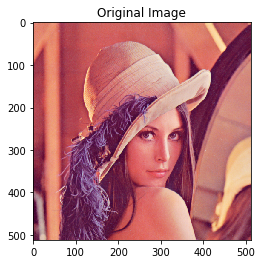

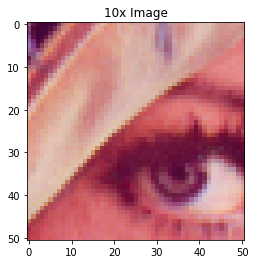

In [385]:
image = cv2.imread('Figures/Lenna.png',-1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

h = image.shape[0]
w = image.shape[1]

image10x = image[int(h/2-h/20):int(h/2+h/20),int(w/2-w/20):int(w/2+w/20)]


plt.figure(3)
plt.imshow(image)
plt.title('Original Image')

plt.figure(4)
plt.imshow(image10x)
plt.title('10x Image')

plt.show()

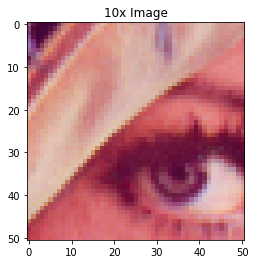

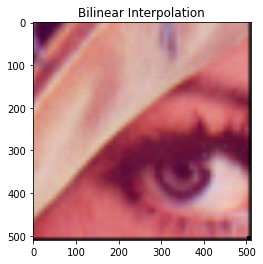

In [389]:
def bilinearInterpolation(Q, alfa, beta):
    x = (1-alfa)*Q[0][0] + alfa*Q[1][0]
    y = (1-alfa)*Q[0][1] + alfa*Q[1][1]
    z = (1-beta)*x + beta*y
    return z

def bilinearInterpolationImage(image, scale):
    h = image.shape[0]
    w = image.shape[1]
    row = 0
    col = 0  

    interImage = np.zeros((h*scale, w*scale, 3), np.uint8)    
    
    for row in range(0, h):
        for col in range(0, w):
            
            interImage[(row)*scale, (col)*scale] = image[row,col]            
            for x in range(0,scale):                    
                for y in range(0,scale):
                    if row < h-1 and col < w-1:
                        interImage[row*scale+x,col*scale+y] = bilinearInterpolation(image[row:row+2,col:col+2], (x)/scale, (y)/scale)
                    else:
                        tmp = np.zeros((2, 2, 3), np.uint8) 
                        if row == h-1 and col == w-1:
                            break
                        elif row == h-1:
                            tmp[0,0:2] = image[row,col:col+2]
                            interImage[row*scale+x,col*scale+y] = bilinearInterpolation(tmp, (x)/scale, (y)/scale)
                        else:   
                            tmp[0:2,0] = image[row:row+2,col]
                            interImage[row*scale+x,col*scale+y] = bilinearInterpolation(tmp, (x)/scale, (y)/scale)
    return interImage

imageInterpolated = bilinearInterpolationImage(image10x, 10)

plt.figure(5)
plt.imshow(image10x)
plt.title('10x Image')

plt.figure(6)
plt.imshow(imageInterpolated)
plt.title('Bilinear Interpolation')

plt.show()

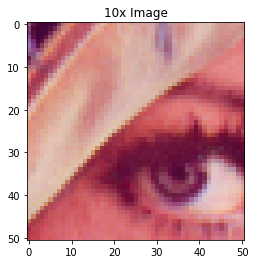

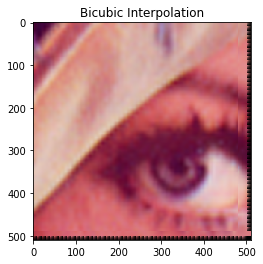

In [587]:
def F(I,beta):
    return -beta*(1-beta)**2*I[0] + (1-2*beta**2+beta**3)*I[1] + beta*(1+beta-beta**2)*I[2] - beta**2*(1-beta)*I[3]

def bicubicInterpolation(Q, alfa, beta):
    return -alfa*(1-alfa)**2*F(Q[0],beta) + (1-2*alfa**2+alfa**3)*F(Q[1],beta) + alfa*(1+alfa-alfa**2)*F(Q[2],beta) - alfa**2*(1-alfa)*F(Q[2],beta) 
    
def bicubicInterpolationImage(image, scale):
    h = image.shape[0]
    w = image.shape[1]
    row = 0
    col = 0  

    interImage = np.zeros((h*scale, w*scale, 3), np.uint8) 
    
    for row in range(0, h):
        for col in range(0, w):
            
            interImage[(row)*scale, (col)*scale] = image[row,col]            
            for x in range(0,scale):                    
                for y in range(0,scale):
                    if row < h-2 and col < w-3:
                        interImage[row*scale+x,col*scale+y] = bicubicInterpolation(image[row:row+4,col:col+4], (x)/scale, (y)/scale)                  
                    else:
                        tmp = np.zeros((4, 4, 3), np.uint8) 
                        if row == h-1 and col == w-1:
                            break
                        else:
                            if row>h-3:
                                n = h-row
                            else:
                                n = w-col
                            tmp[0:n,0:n] = image[row:row+n,col:col+n]
                            interImage[row*scale+x,col*scale+y] = bilinearInterpolation(tmp, (x)/scale, (y)/scale)
                       
                            
                            
    return interImage
                    
    
imageInterpolated = bicubicInterpolationImage(image10x, 10)

plt.figure(7)
plt.imshow(image10x)
plt.title('10x Image')

plt.figure(8)
plt.imshow(imageInterpolated)
plt.title('Bicubic Interpolation')


plt.show()


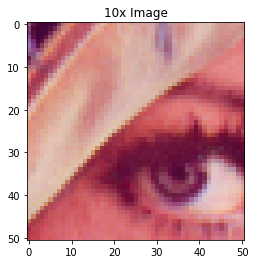

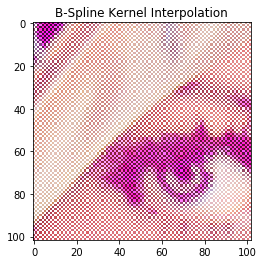

In [588]:
def bSplineKernel(n):
    kernel = np.zeros((n, n), np.uint8)
    for x in range(n):
        for y in range(n):
            if x == y:
                kernel[x][y] = 4
            elif x + 1 == y or x - 1 == y:
                kernel[x][y] = 1
    return kernel

def bSplineInterpolationImage(image, scale):
    h = image.shape[0]
    w = image.shape[1]
    row = 0
    col = 0  

    interImage = np.zeros((h*scale, w*scale, 3), np.uint8)
    for row in range(0, h):
        for col in range(0, w):            
            interImage[(row)*scale, (col)*scale] = image[row,col]
    
    kernel = bSplineKernel(scale)

    interImage = cv2.filter2D(interImage,-1,kernel)
            
    return  interImage


interImage = bSplineInterpolationImage(image10x, 2);

plt.figure(9)
plt.imshow(image10x)
plt.title('10x Image')

plt.figure(10)
plt.imshow(interImage)
plt.title('B-Spline Kernel Interpolation')



plt.show()


<h1 style="font-size:200%; color:red; text-align:center; line-height : 55px;"> 2. Evaluación de Desempeño </h1>



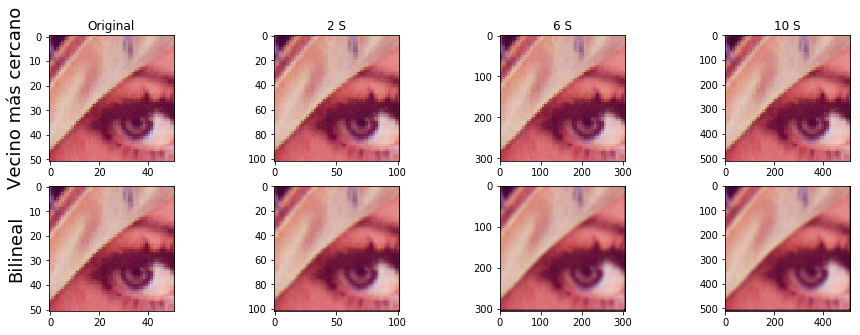

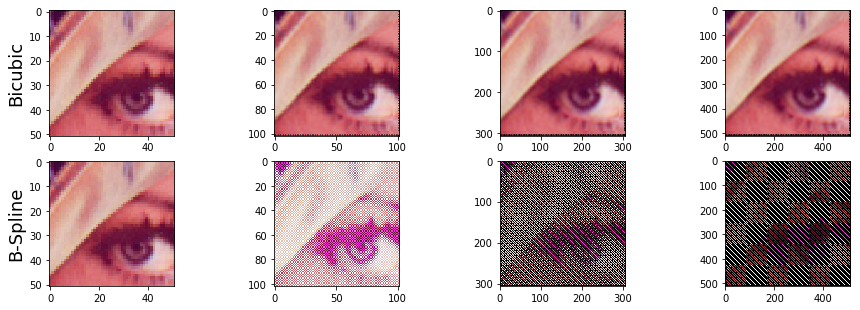

In [596]:
plt.figure(8)
plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=2)
plt.subplot(441) ,plt.imshow(image10x)
plt.ylabel('Vecino más cercano', fontsize=18)
plt.title('Original')

nearestNeighbour = interpolacionVecinosMasCercanos(image10x, 2, 2)
plt.subplot(442) ,plt.imshow(nearestNeighbour)
plt.title('2 S')

nearestNeighbour = interpolacionVecinosMasCercanos(image10x, 6, 6)
plt.subplot(443) ,plt.imshow(nearestNeighbour)
plt.title('6 S')

nearestNeighbour = interpolacionVecinosMasCercanos(image10x, 10, 10)
plt.subplot(444) ,plt.imshow(nearestNeighbour)
plt.title('10 S')

plt.subplot(445) ,plt.imshow(image10x)
plt.ylabel('Bilineal', fontsize=18)

bilinear = bilinearInterpolationImage(image10x, 2)
plt.subplot(446) ,plt.imshow(bilinear)

bilinear = bilinearInterpolationImage(image10x, 6)
plt.subplot(447) ,plt.imshow(bilinear)

bilinear = bilinearInterpolationImage(image10x, 10)
plt.subplot(448) ,plt.imshow(bilinear)
plt.show()

plt.figure(9)
plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=2)
plt.subplot(441) ,plt.imshow(image10x)
plt.ylabel('Bicubic', fontsize=18)

bicubic = bicubicInterpolationImage(image10x, 2)
plt.subplot(442) ,plt.imshow(bicubic)

bicubic = bicubicInterpolationImage(image10x, 6)
plt.subplot(443) ,plt.imshow(bicubic)

bicubic = bicubicInterpolationImage(image10x, 10)
plt.subplot(444) ,plt.imshow(bicubic)

plt.subplot(445) ,plt.imshow(image10x)
plt.ylabel('B-Spline', fontsize=18)

BSpline = bSplineInterpolationImage(image10x, 2)
plt.subplot(446) ,plt.imshow(BSpline)

BSpline = bSplineInterpolationImage(image10x, 6)
plt.subplot(447) ,plt.imshow(BSpline)

BSpline = bSplineInterpolationImage(image10x, 10)
plt.subplot(448) ,plt.imshow(BSpline)


plt.show()

<p style="font-size:135%;">La interpolación basada en los vecinos mas cercanos se ubica dentro de los algoritmos mas simples y rápidos para su implementación, no obstante, genera un resultado proporcional a lo anterior, mantiene la forma de la imagen en la medida que se aumenta el escalado pero mantiene un contraste constante. 
</p>

<p style="font-size:135%;">Los algoritmos bilineal y bicubico actuan de manera muy parecida, en ambos casos se lleva la imagen a un tamaño 10 veces el de su original mejorando el contraste en la medida que la resolución es amplificada sin embargo, cabe destacar que ambos algoritmos son mas complejos en relación al vecino mas cerca, al tomar un mayor numero de muestras el complejidad aumenta de manera exponencial, y, aunque es mejor el resultado presentado por el algoritmo bicubico en relación al algoritmo bilineal en algunos detalles de la imagen, no argumenta el aumento de complejidad, aunque en aplicaciones de una sola ejecución su desempeño supera al bilineal. </p>